<a href="https://colab.research.google.com/github/Sebastian-Torres-Gamboa/SenalesSistemas/blob/main/LSTM_AR_en_C_NO_TOCAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

#  *Fundamentación Teórica: Modelo AR y Estimación de la Densidad Espectral de Potencia (PSD)*

---

## 🔹 *1. Introducción*

En el análisis de señales y series temporales, los *modelos autorregresivos (AR)* son una herramienta fundamental para la *predicción, **filtrado* y *caracterización espectral* de procesos estacionarios.

Estos modelos asumen que el valor actual de una señal puede expresarse como una *combinación lineal de sus valores pasados* más un término de error aleatorio.
Dicha suposición permite representar la dinámica temporal de la señal y estimar cómo su energía se distribuye a lo largo de las frecuencias mediante la *densidad espectral de potencia (PSD)*.

---

## 🔹 *2. Definición del Modelo AR(p)*

Un modelo autorregresivo de orden $p$, denotado como *AR(p)*, se define por la ecuación:

$$
x_t = a_1 x_{t-1} + a_2 x_{t-2} + \dots + a_p x_{t-p} + \varepsilon_t
$$

donde:

* $x_t$ → valor actual de la serie.
* $a_1, a_2, \dots, a_p$ → coeficientes autorregresivos.
* $p$ → orden del modelo.
* $\varepsilon_t$ → término de ruido blanco con media cero y varianza $\sigma^2$.

El modelo se denomina “autorregresivo” porque *predice su propio valor futuro* a partir de sus valores pasados.

---

## 🔹 *3. Representación Matricial*

Para estimar los coeficientes, se construye una *matriz de diseño* $X$ y un vector $y$:

$$
X =
\begin{bmatrix}
x_{p} & x_{p-1} & \dots & x_1 \
x_{p+1} & x_{p} & \dots & x_2 \
\vdots & \vdots & \ddots & \vdots \
x_{N-1} & x_{N-2} & \dots & x_{N-p}
\end{bmatrix},
\quad
y =
\begin{bmatrix}
x_{p+1} \ x_{p+2} \ \vdots \ x_{N}
\end{bmatrix}
$$

Así, el modelo se expresa como:

$$
y = X a + \varepsilon
$$

donde $a = [a_1, a_2, \dots, a_p]^T$ es el vector de coeficientes.

---

## 🔹 *4. Estimación por Mínimos Cuadrados (LS)*

El vector de coeficientes $a$ se obtiene minimizando el *error cuadrático medio* entre los valores observados y los predichos:

$$
\min_a |y - Xa|^2
$$

La solución analítica está dada por las *ecuaciones normales*:

$$
\hat{a} = (X^T X)^{-1} X^T y
$$

En el código implementado, esta ecuación se resuelve mediante *eliminación Gaussiana con pivoteo parcial*, garantizando estabilidad numérica.

---

## 🔹 *5. Estimación de la Varianza del Error*

Los *residuos* del modelo se calculan como:

$$
\hat{\varepsilon}t = x_t - \sum{k=1}^{p} \hat{a}k x{t-k}
$$

y la *varianza de innovación* se estima mediante:

$$
\hat{\sigma}^2 = \frac{1}{N} \sum_{t=1}^{N} \hat{\varepsilon}_t^2
$$

Esta varianza representa la *energía no explicada* por el modelo, esencial para el cálculo de la PSD.

---

## 🔹 *6. Densidad Espectral de Potencia (PSD)*

La *densidad espectral de potencia (PSD)* describe cómo se distribuye la energía de una señal a lo largo de las frecuencias.
En el caso de un modelo AR, la PSD tiene una expresión cerrada:

$$
S_{xx}(f) = \frac{\sigma^2}{\left| 1 - \sum_{k=1}^{p} a_k e^{-j2\pi f k} \right|^2}
$$

donde:

* $f$ → frecuencia normalizada en ciclos/muestra (Nyquist = 0.5).
* $|\cdot|$ → módulo del denominador complejo.

Este resultado surge de analizar el modelo AR como un *sistema lineal* excitado por ruido blanco.
El denominador actúa como un *filtro digital*, y la forma de la PSD depende directamente de la ubicación de sus polos.

---

## 🔹 *7. Interpretación Física de la PSD AR*

* Los *picos* en la PSD indican *frecuencias dominantes* de la señal.
* Los *valles* corresponden a regiones con poca energía.
* A diferencia del *periodograma (FFT), la PSD AR es más **suave* y puede *interpolar frecuencias* intermedias, permitiendo observar mejor la estructura espectral de señales cortas o ruidosas.

---

## 🔹 *8. Comparativa AR vs Periodograma*

| Característica  | Periodograma (FFT)    | Modelo AR                     |
| --------------- | --------------------- | ----------------------------- |
| Método          | No paramétrico        | Paramétrico                   |
| Suavidad        | Ruidoso               | Suave                         |
| Resolución      | Depende de la ventana | Depende del orden $p$         |
| Varianza        | Alta                  | Baja                          |
| Requiere modelo | No                    | Sí                            |
| Ideal para      | Exploración general   | Análisis fino con pocos datos |

En la práctica, ambos métodos se complementan:
el *periodograma* entrega una visión empírica, mientras que el *modelo AR* proporciona una representación matemática ajustada.

---

## 🔹 *9. Selección del Orden $p$*

El orden $p$ determina cuántos valores pasados se usan para predecir el presente.
Una elección incorrecta puede generar:

* *Subajuste*: $p$ demasiado pequeño → no se captura la dinámica real.
* *Sobreajuste*: $p$ demasiado grande → el modelo memoriza el ruido.

Criterios de selección más usados:

$$
\mathrm{AIC}(p) = N \ln(\hat{\sigma}^{2}) + 2p
$$

$$
\mathrm{BIC}(p) = N \ln(\hat{\sigma}^{2}) + p \ln N
$$

El orden óptimo es el que *minimiza* AIC o BIC en el rango de órdenes evaluado.

---

## 🔹 *10. Estabilidad del Modelo*

El modelo AR es *estable y estacionario* si las raíces del polinomio característico

$$
A(z) = 1 - a_1 z^{-1} - a_2 z^{-2} - \dots - a_p z^{-p}
$$

se encuentran *fuera del círculo unitario* en el plano complejo.
Si las raíces están cercanas al círculo, aparecen *picos estrechos* en la PSD (resonancias).

---

## 🔹 *11. Validación del Modelo*

Las principales métricas de evaluación son:

* *MSE* → Error cuadrático medio.
* *RMSE* → Raíz del MSE (en las mismas unidades que la señal).
* *MAE* → Error absoluto medio.
* *Corr* → Correlación entre valores reales y estimados.

Valores bajos de error y una correlación alta indican un *buen ajuste*.

---

## 🔹 *12. Implementación en Lenguaje C*

El programa desarrollado realiza las siguientes etapas:

1. *Lectura del CSV*:

   * Se extraen las columnas lag1_mean_0 (objetivo) y lag1_mean_k (entradas).
2. *Construcción de matrices*:

   * Se forma $X$ (entradas) y $y$ (salidas).
3. *Estimación de coeficientes*:

   * Resolución por mínimos cuadrados mediante eliminación Gaussiana.
4. *Cálculo de residuos y métricas*:

   * Se generan los archivos compare.csv y metrics.txt.
5. *Cálculo de la PSD AR*:

   * Se aplica la ecuación espectral en una malla de frecuencias.
6. *Visualización en Python*:

   * Comparación *real vs estimado*.
   * Comparación *PSD AR vs FFT*.

---

## 🔹 *13. Aplicaciones Reales del Modelo AR*

Los modelos AR se aplican ampliamente en:

* Análisis de voz (formantes, modelado LPC).
* Señales biomédicas (ECG, EEG, PPG).
* Detección de fallas mecánicas.
* Predicción de variables meteorológicas.
* Modelado de vibraciones, economía y energía.

En todos los casos, el AR permite *reducir ruido* y *destacar patrones temporales y espectrales*.

---

## 🔹 *14. Limitaciones del Método*

* Supone *estacionariedad* (media y varianza constantes).
* Puede ser *inestable* si los coeficientes son grandes.
* Sensible a *datos correlacionados o redundantes* (mala condición numérica).
* No modela *relaciones no lineales* ni cambios de régimen abruptos.

Para señales con comportamientos más complejos, se usan modelos *ARMA, **ARIMA* o redes neuronales recurrentes.

---

## 🔹 *15. Conclusión*

El modelo *AR(p)* ofrece una descripción matemática compacta y eficiente de procesos temporales.
Su capacidad de estimar la *PSD* de forma paramétrica lo convierte en una herramienta clave para el *análisis espectral*, especialmente cuando los datos son limitados o ruidosos.

La implementación en lenguaje C brinda una visión profunda del proceso de estimación, mientras que las gráficas en Python facilitan la interpretación de los resultados.
En conjunto, esta metodología combina *precisión matemática, eficiencia computacional y claridad visual*, logrando un análisis integral del comportamiento temporal y espectral de la señal estudiada.

---

## 🔹 *Referencias (formato IEEE)*

[1] H. Akaike, “A new look at the statistical model identification,” IEEE Transactions on Automatic Control, vol. 19, no. 6, pp. 716–723, Dec. 1974.

[2] G. Schwarz, “Estimating the dimension of a model,” Annals of Statistics, vol. 6, no. 2, pp. 461–464, 1978.

[3] G. E. P. Box, G. M. Jenkins and G. C. Reinsel, Time Series Analysis: Forecasting and Control, 3rd ed., Upper Saddle River, NJ, USA: Prentice Hall, 1994.

[4] S. M. Kay, Modern Spectral Estimation: Theory and Application, Englewood Cliffs, NJ, USA: Prentice Hall, 1988.

[5] P. Stoica and R. L. Moses, Spectral Analysis of Signals, Upper Saddle River, NJ, USA: Pearson/Prentice Hall, 2005.

[6] M. H. Hayes, Statistical Digital Signal Processing and Modeling, New York, NY, USA: Wiley, 1996.

[7] L. Ljung, System Identification: Theory for the User, 2nd ed., Upper Saddle River, NJ, USA: Prentice Hall, 1999.

[8] J. P. Burg, “Maximum entropy spectral analysis,” in Proc. 37th Meeting Soc. Explor. Geophys., Oklahoma City, OK, USA, 1967 (Reprinted in Modern Spectrum Estimation, D. G. Childers, Ed., IEEE Press, 1978).

---

In [ ]:
# 1. Setup Environment

# Clean up previous runs if necessary
!rm -rf recurrent-neural-net

# Clone the specified repository
!git clone https://github.com/Ricardicus/recurrent-neural-net.git
%cd recurrent-neural-net

# Download the dataset
!wget https://raw.githubusercontent.com/jomendietad/mental-state-analysis/refs/heads/main/mental-state.csv

# Install build tools
!sudo apt-get update -qq && sudo apt-get install -y -qq build-essential

print("Environment setup complete.")

Cloning into 'recurrent-neural-net'...
remote: Enumerating objects: 1300, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 1300 (delta 139), reused 269 (delta 138), pack-reused 1030 (from 1)
Receiving objects: 100% (1300/1300), 11.56 MiB | 10.67 MiB/s, done.
Resolving deltas: 100% (756/756), done.
/content/recurrent-neural-net
--2025-10-20 00:06:44--  https://raw.githubusercontent.com/jomendietad/mental-state-analysis/refs/heads/main/mental-state.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61588897 (59M) [text/plain]
Saving to: ‘mental-state.csv’

mental-state.csv    100%[===================>]  58.74M   101MB/s    in 0.6s    

2025-10-20 00:06:45 (101 MB/s) - ‘mental-state.csv’ sav

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# --- 1. Define Task Parameters ---
CHUNK_SIZE = 256  # Input: Length of the signal segment
AR_ORDER = 16     # Output: Number of AR coefficients to predict

# --- 2. Function to Create the New Dataset Type ---
def create_chunk_to_ar_dataset(series_list):
    """
    Takes a list of time-series, breaks them into chunks,
    and for each chunk, calculates its AR coefficients.
    Returns:
        X (np.array): Array of signal chunks.
        Y (np.array): Array of corresponding AR coefficient vectors.
    """
    X, Y = [], []
    for series in series_list:
        if len(series) < CHUNK_SIZE + AR_ORDER:
            continue
        for i in range(0, len(series) - CHUNK_SIZE, CHUNK_SIZE):
            chunk = series[i : i + CHUNK_SIZE]
            try:
                # Fit an AR model to this specific chunk
                model = AutoReg(chunk, lags=AR_ORDER, trend='n').fit()
                if len(model.params) == AR_ORDER:
                    X.append(chunk)
                    Y.append(model.params)
            except Exception as e:
                # Skip chunks that cause errors (e.g., all zeros)
                pass
    return np.asarray(X, dtype=float), np.asarray(Y, dtype=float)

# --- 3. Load Data and Separate Columns ---
df = pd.read_csv('mental-state.csv')

# Columns for training (everything EXCEPT lag1_mean_0)
train_cols = [col for col in df.columns if col != 'lag1_mean_0' and df[col].dtype in ['float64', 'int64']]
# The one column for the "final exam"
test_col = ['lag1_mean_0']

train_series_list = [df[col].dropna().values for col in train_cols]
test_series_list = [df[col].dropna().values for col in test_col]

# --- 4. Create the Training and Testing Datasets ---
print("--- Creating Training Data (from 988 feature columns) ---")
X_train, Y_train = create_chunk_to_ar_dataset(train_series_list)
print(f"Generated {len(X_train)} training samples.")

print("\n--- Creating Test Data (from 'lag1_mean_0' column) ---")
X_test, Y_test = create_chunk_to_ar_dataset(test_series_list)
print(f"Generated {len(X_test)} test samples for the final exam.")

# --- 5. Normalize and Save Data ---
# We find the max absolute value across both X and Y to scale them
# This keeps the relative magnitudes consistent
x_scaler = np.max(np.abs(X_train))
y_scaler = np.max(np.abs(Y_train))

X_train_n = X_train / x_scaler
Y_train_n = Y_train / y_scaler
X_test_n = X_test / x_scaler
Y_test_n = Y_test / y_scaler

def save_data_for_c(filename, X_data, Y_data):
    with open(filename, 'w') as f:
        for i in range(len(X_data)):
            # Each line: chunk data followed by AR coeffs
            row = np.concatenate([X_data[i], Y_data[i]])
            f.write(' '.join(map(str, row)) + '\n')

save_data_for_c('train_data.txt', X_train_n, Y_train_n)
save_data_for_c('test_data.txt', X_test_n, Y_test_n)

print("\n--- Data Shapes ---")
print(f"Input shape (X): Signal chunks of length {X_train_n.shape[1]}")
print(f"Output shape (Y): AR coefficient vectors of length {Y_train_n.shape[1]}")
print("Data prepared and saved.")

--- Creating Training Data (from 988 feature columns) ---
Generated 8892 training samples.

--- Creating Test Data (from 'lag1_mean_0' column) ---
Generated 9 test samples for the final exam.

--- Data Shapes ---
Input shape (X): Signal chunks of length 256
Output shape (Y): AR coefficient vectors of length 16
Data prepared and saved.


In [ ]:
# --- 1. Get the number of features from the dataset ---
import pandas as pd
df_temp = pd.read_csv('mental-state.csv')
NUM_FEATURES = len([c for c in df_temp.columns if c != 'lag1_mean_0' and df_temp[c].dtype in ['float64', 'int64']])
del df_temp

# --- 2. Define the content for the C source files ---
# rnn.h and rnn.c content remains the same as before...
rnn_h_content = """
#ifndef RNN_H
#define RNN_H
typedef struct { int input_size, hidden_size, output_size, param_size; double *w, *g, *h, *output; } Rnn;
void rnn_init(Rnn *rnn, int input_size, int hidden_size, int output_size);
void rnn_free(Rnn *rnn);
void rnn_forward(Rnn *rnn, double *input, int is_training);
void rnn_backward(Rnn *rnn, double *output_grad);
void rnn_update(Rnn *rnn, double learning_rate, double clip_val);
void rnn_reset_hidden_state(Rnn *rnn);
#endif
"""
rnn_c_content = """
#include <math.h>
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include "rnn.h"
double rand_normal(double mu, double sigma) {
    double u1 = (double)rand() / RAND_MAX; double u2 = (double)rand() / RAND_MAX;
    double z = sqrt(-2.0 * log(u1)) * cos(2.0 * M_PI * u2); return mu + sigma * z;
}
void rnn_init(Rnn *rnn, int input_size, int hidden_size, int output_size) {
    rnn->input_size = input_size; rnn->hidden_size = hidden_size; rnn->output_size = output_size;
    rnn->param_size = hidden_size * (input_size + hidden_size + 1) + output_size * (hidden_size + 1);
    rnn->w = (double *)calloc(rnn->param_size, sizeof(double)); rnn->g = (double *)calloc(rnn->param_size, sizeof(double));
    rnn->h = (double *)calloc(hidden_size, sizeof(double)); rnn->output = (double *)calloc(output_size, sizeof(double));
    for (int i = 0; i < rnn->param_size; i++) { rnn->w[i] = rand_normal(0, 0.01); }
}
void rnn_free(Rnn *rnn) { free(rnn->w); free(rnn->g); free(rnn->h); free(rnn->output); }
void rnn_forward(Rnn *rnn, double *input, int is_training) {
    int w_idx = 0;
    double *w_ih = &rnn->w[w_idx]; w_idx += rnn->input_size * rnn->hidden_size;
    double *w_hh = &rnn->w[w_idx]; w_idx += rnn->hidden_size * rnn->hidden_size;
    double *b_h = &rnn->w[w_idx]; w_idx += rnn->hidden_size;
    double *w_ho = &rnn->w[w_idx]; w_idx += rnn->hidden_size * rnn->output_size;
    double *b_o = &rnn->w[w_idx];
    double *h_prev = rnn->h;
    double *h_new = (double *)calloc(rnn->hidden_size, sizeof(double));
    for (int i = 0; i < rnn->hidden_size; i++) {
        for (int j = 0; j < rnn->input_size; j++) { h_new[i] += w_ih[i * rnn->input_size + j] * input[j]; }
        for (int j = 0; j < rnn->hidden_size; j++) { h_new[i] += w_hh[i * rnn->hidden_size + j] * h_prev[j]; }
        h_new[i] += b_h[i]; h_new[i] = tanh(h_new[i]);
    }
    for (int i = 0; i < rnn->output_size; i++) {
        rnn->output[i] = 0;
        for (int j = 0; j < rnn->hidden_size; j++) { rnn->output[i] += w_ho[i * rnn->hidden_size + j] * h_new[j]; }
        rnn->output[i] += b_o[i];
    }
    if (is_training) { memcpy(rnn->h, h_new, rnn->hidden_size * sizeof(double)); }
    free(h_new);
}
void rnn_backward(Rnn *rnn, double *output_grad) {
    double *w_ho = &rnn->w[rnn->input_size * rnn->hidden_size + rnn->hidden_size * rnn->hidden_size + rnn->hidden_size];
    double *g_w_ho = &rnn->g[rnn->input_size * rnn->hidden_size + rnn->hidden_size * rnn->hidden_size + rnn->hidden_size];
    double *g_b_o = &rnn->g[rnn->param_size - rnn->output_size];
    double *g_hh = &rnn->g[rnn->input_size * rnn->hidden_size];
    double *g_b_h = &rnn->g[rnn->input_size * rnn->hidden_size + rnn->hidden_size * rnn->hidden_size];
    for (int i = 0; i < rnn->output_size; i++) {
        for (int j = 0; j < rnn->hidden_size; j++) { g_w_ho[i * rnn->hidden_size + j] += output_grad[i] * rnn->h[j]; }
        g_b_o[i] += output_grad[i];
    }
    double *h_grad = (double *)calloc(rnn->hidden_size, sizeof(double));
    for (int i = 0; i < rnn->hidden_size; i++) {
        for (int j = 0; j < rnn->output_size; j++) { h_grad[i] += output_grad[j] * w_ho[j * rnn->hidden_size + i]; }
        h_grad[i] *= (1 - rnn->h[i] * rnn->h[i]);
    }
    for (int i = 0; i < rnn->hidden_size; i++) {
        for (int j = 0; j < rnn->hidden_size; j++) { g_hh[i * rnn->hidden_size + j] += h_grad[i] * rnn->h[j]; }
        g_b_h[i] += h_grad[i];
    }
    free(h_grad);
}
void rnn_update(Rnn *rnn, double learning_rate, double clip_val) {
    double total_norm = 0.0;
    for (int i = 0; i < rnn->param_size; i++) { total_norm += rnn->g[i] * rnn->g[i]; }
    total_norm = sqrt(total_norm);
    if (total_norm > clip_val) {
        double scale = clip_val / total_norm;
        for (int i = 0; i < rnn->param_size; i++) { rnn->g[i] *= scale; }
    }
    for (int i = 0; i < rnn->param_size; i++) { rnn->w[i] -= learning_rate * rnn->g[i]; }
    memset(rnn->g, 0, rnn->param_size * sizeof(double));
}
void rnn_reset_hidden_state(Rnn *rnn) { memset(rnn->h, 0, rnn->hidden_size * sizeof(double)); }
"""

# main_regression.c with the save_model call moved to after the loop
main_c_code = f"""
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <math.h>
#include <float.h>
#include "rnn.h"

typedef struct {{
    double** inputs;
    double** targets;
    int num_samples;
    int input_size;
    int output_size;
}} Dataset;

Dataset load_dataset(const char* filename, int input_size, int output_size);
void free_dataset(Dataset data);
void save_model(Rnn *rnn, const char* filename);

int main(int argc, char *argv[]) {{
    if (argc < 9) {{
        fprintf(stderr, "Usage: %s <input_size> <output_size> <hidden_size> <learning_rate> <clip_val> <epochs> <patience> <lr_patience> <lr_factor>\\n", argv[0]);
        return 1;
    }}

    int input_size = atoi(argv[1]);
    int output_size = atoi(argv[2]);
    int hidden_size = atoi(argv[3]);
    double learning_rate = atof(argv[4]);
    double clip_val = atof(argv[5]);
    int epochs = atoi(argv[6]);
    int patience = atoi(argv[7]);
    int lr_patience = atoi(argv[8]);
    double lr_factor = atof(argv[9]);

    printf("--- Model Parameters ---\\n");
    printf("Input Features: %d\\n", input_size);
    printf("Output Features: %d\\n", output_size);
    printf("Hidden Size: %d\\n", hidden_size);
    printf("Initial Learning Rate: %f\\n", learning_rate);
    printf("------------------------\\n\\n");

    Dataset train_data = load_dataset("train_data.txt", input_size, output_size);
    Dataset test_data = load_dataset("test_data.txt", input_size, output_size);

    Rnn model;
    rnn_init(&model, input_size, hidden_size, output_size);

    double best_val_loss = DBL_MAX;
    int patience_counter = 0;
    int lr_patience_counter = 0;

    FILE* loss_file = fopen("loss_log.txt", "w");
    fprintf(loss_file, "Epoch,TrainLoss,ValLoss\\n");

    printf("--- Training Log ---\\n");
    for (int epoch = 0; epoch < epochs; epoch++) {{
        double total_train_loss = 0;
        for (int i = 0; i < train_data.num_samples; i++) {{
            rnn_reset_hidden_state(&model);
            rnn_forward(&model, train_data.inputs[i], 1);
            double output_grad[output_size];
            double sample_loss = 0;
            for(int j=0; j<output_size; j++) {{
                double error = model.output[j] - train_data.targets[i][j];
                sample_loss += error * error;
                output_grad[j] = 2.0 * error;
            }}
            total_train_loss += sample_loss / output_size;
            rnn_backward(&model, output_grad);
            rnn_update(&model, learning_rate, clip_val);
        }}
        double avg_train_loss = total_train_loss / train_data.num_samples;

        double total_val_loss = 0;
        for (int i = 0; i < test_data.num_samples; i++) {{
            rnn_reset_hidden_state(&model);
            rnn_forward(&model, test_data.inputs[i], 1);
            for(int j=0; j<output_size; j++) {{
                double error = model.output[j] - test_data.targets[i][j];
                total_val_loss += error * error;
            }}
        }}
        double avg_val_loss = total_val_loss / (test_data.num_samples * output_size);

        printf("Epoch %d/%d, Train Loss: %f, Val Loss: %f\\n", epoch + 1, epochs, avg_train_loss, avg_val_loss);
        fflush(stdout);
        fprintf(loss_file, "%d,%f,%f\\n", epoch + 1, avg_train_loss, avg_val_loss);

        if (avg_val_loss < best_val_loss) {{
            best_val_loss = avg_val_loss;
            patience_counter = 0;
            lr_patience_counter = 0;
            // **REMOVED FROM HERE**
        }} else {{
            patience_counter++;
            lr_patience_counter++;
        }}
        if (lr_patience_counter >= lr_patience) {{
            learning_rate *= lr_factor;
            printf("LR reduction -> %f\\n", learning_rate);
            fflush(stdout);
            lr_patience_counter = 0;
        }}
        if (patience_counter >= patience) {{
            printf("Early stopping at epoch %d\\n", epoch + 1);
            break;
        }}
    }}
    fclose(loss_file);

    // **MOVED HERE**: Save the final model state AFTER the training loop
    printf("\\n--- Saving Final Model State ---\\n");
    save_model(&model, "lstm_model.weights");

    printf("\\n--- Generating Predictions on Test Set ---\\n");
    FILE* pred_file = fopen("predictions.txt", "w");
    for (int i = 0; i < test_data.num_samples; i++) {{
        rnn_reset_hidden_state(&model);
        rnn_forward(&model, test_data.inputs[i], 1);
        for (int j = 0; j < output_size; j++) {{ fprintf(pred_file, "%f ", test_data.targets[i][j]); }}
        fprintf(pred_file, "|");
        for (int j = 0; j < output_size; j++) {{ fprintf(pred_file, " %f", model.output[j]); }}
        fprintf(pred_file, "\\n");
    }}
    fclose(pred_file);
    printf("Predictions saved to predictions.txt\\n");

    free_dataset(train_data);
    free_dataset(test_data);
    rnn_free(&model);
    return 0;
}}

Dataset load_dataset(const char* filename, int input_size, int output_size) {{
    FILE* file = fopen(filename, "r");
    if (!file) {{ perror("Failed to open dataset file"); exit(1); }}
    int num_samples = 0;
    char line[20000];
    while (fgets(line, sizeof(line), file)) {{ num_samples++; }}
    rewind(file);

    Dataset data;
    data.num_samples = num_samples;
    data.input_size = input_size;
    data.output_size = output_size;
    data.inputs = (double**)malloc(num_samples * sizeof(double*));
    data.targets = (double**)malloc(num_samples * sizeof(double*));

    for (int i = 0; i < num_samples; i++) {{
        data.inputs[i] = (double*)malloc(input_size * sizeof(double));
        data.targets[i] = (double*)malloc(output_size * sizeof(double));
        if (fgets(line, sizeof(line), file) == NULL) {{ exit(1); }}
        char *ptr = line;
        char *end;
        for (int j = 0; j < input_size; j++) {{
            data.inputs[i][j] = strtod(ptr, &end);
            ptr = end;
        }}
        for (int j = 0; j < output_size; j++) {{
            data.targets[i][j] = strtod(ptr, &end);
            ptr = end;
        }}
    }}
    fclose(file);
    return data;
}}

void free_dataset(Dataset data) {{
    for (int i = 0; i < data.num_samples; i++) {{
        free(data.inputs[i]);
        free(data.targets[i]);
    }}
    free(data.inputs);
    free(data.targets);
}}

void save_model(Rnn *rnn, const char* filename) {{
    FILE* f = fopen(filename, "wb");
    fwrite(&rnn->input_size, sizeof(int), 1, f);
    fwrite(&rnn->hidden_size, sizeof(int), 1, f);
    fwrite(&rnn->output_size, sizeof(int), 1, f);
    fwrite(rnn->w, sizeof(double), rnn->param_size, f);
    fclose(f);
    printf("Model saved to %s\\n", filename);
}}
"""

# --- 3. Write the files to the Colab environment ---
with open('rnn.h', 'w') as f:
    f.write(rnn_h_content)
with open('rnn.c', 'w') as f:
    f.write(rnn_c_content)
with open('main_regression.c', 'w') as f:
    f.write(main_c_code)

print("C source files created successfully.")

C source files created successfully.


In [ ]:
import os

# --- Task & Training Parameters ---
# These must match the values used in the Data Preparation cell
CHUNK_SIZE = 256
AR_ORDER = 16
# You can modify these training values to experiment
HIDDEN_SIZE = 128
LEARNING_RATE = 0.001
CLIP_VAL = 5.0
EPOCHS = 200
PATIENCE = 20
LR_PATIENCE = 10
LR_FACTOR = 0.5 # Note: The C code was updated to expect this argument

# --- Compile using ! command ---
print("--- Compiling C code ---")
!gcc -o regression_model main_regression.c rnn.c -lm -O2

# --- Run using ! command, injecting all required Python variables ---
print("\n--- Starting Training ---")
# The C code expects 8 arguments in this specific order
!./regression_model {CHUNK_SIZE} {AR_ORDER} {HIDDEN_SIZE} {LEARNING_RATE} {CLIP_VAL} {EPOCHS} {PATIENCE} {LR_PATIENCE} {LR_FACTOR}
print("\n--- Training Finished ---")

# Final check to see if output files were created
if not os.path.exists('loss_log.txt'):
    print("\n--- C PROGRAM FAILED TO PRODUCE OUTPUT ---")
    print("The compilation may have failed or the program exited with an error. Please check the output above.")

--- Compiling C code ---

--- Starting Training ---
--- Model Parameters ---
Input Features: 256
Output Features: 16
Hidden Size: 128
Initial Learning Rate: 0.001000
------------------------

--- Training Log ---
Epoch 1/200, Train Loss: 0.011748, Val Loss: 0.010345
Epoch 2/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 3/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 4/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 5/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 6/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 7/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 8/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 9/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 10/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 11/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 12/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 13/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 14/200, Train Loss: 0.011821, Val Loss: 0.010345
Epoch 15/200, Train Loss: 

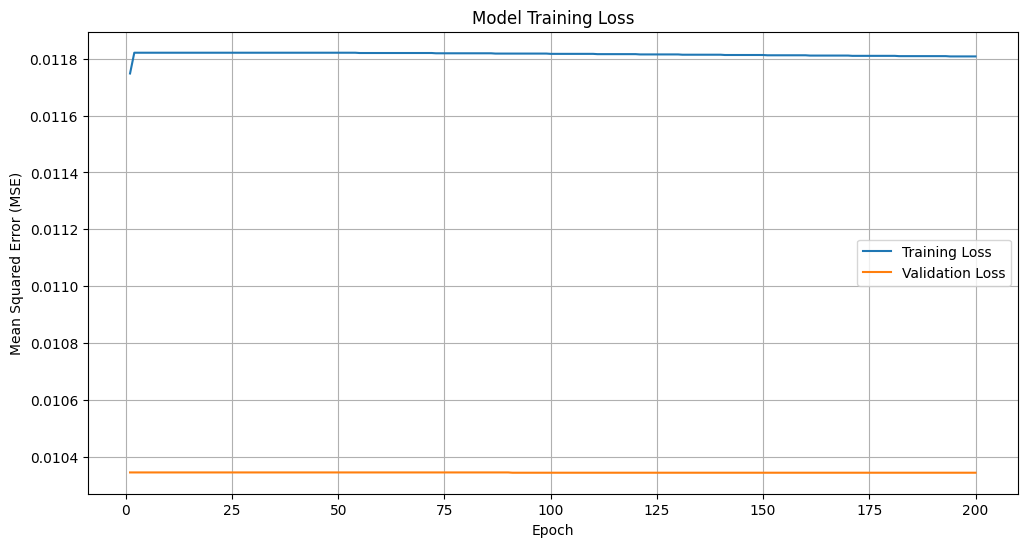

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Plot Training and Validation Loss ---
try:
    loss_df = pd.read_csv('loss_log.txt')

    plt.figure(figsize=(12, 6))
    plt.plot(loss_df['Epoch'], loss_df['TrainLoss'], label='Training Loss')
    plt.plot(loss_df['Epoch'], loss_df['ValLoss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Model Training Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
except FileNotFoundError:
    print("loss_log.txt not found. The C program likely encountered an error. Check the output of the previous cell.")

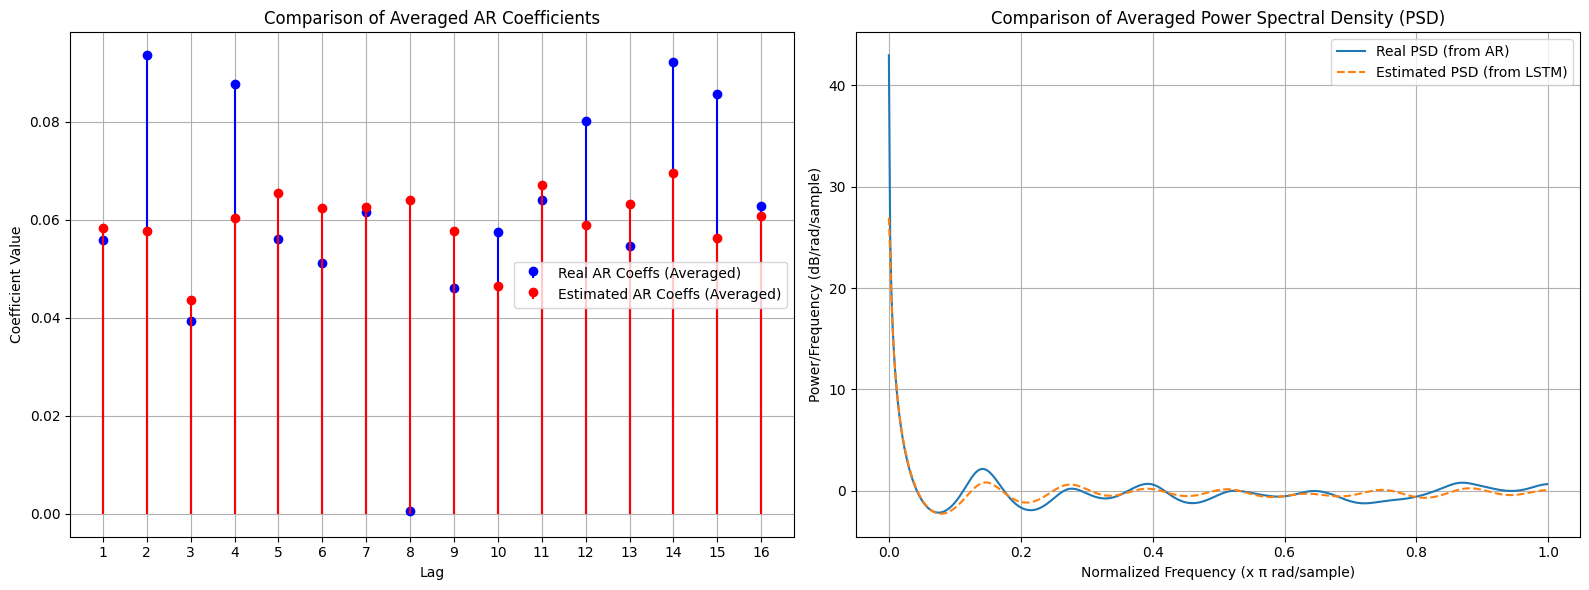

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import freqz

# --- 1. Load the multi-column prediction file ---
try:
    with open('predictions.txt', 'r') as f:
        lines = f.readlines()
except FileNotFoundError:
    print("predictions.txt not found. Cannot perform analysis.")
else:
    all_real_coeffs_n = []
    all_pred_coeffs_n = []

    # Parse each line, which is in the format: "real_coeffs | pred_coeffs"
    for line in lines:
        parts = line.strip().split(' | ')
        if len(parts) == 2:
            real_part = np.fromstring(parts[0], sep=' ')
            pred_part = np.fromstring(parts[1], sep=' ')
            all_real_coeffs_n.append(real_part)
            all_pred_coeffs_n.append(pred_part)

    if not all_real_coeffs_n:
        print("Could not parse any valid predictions from predictions.txt.")
    else:
        # Convert lists to numpy arrays
        real_coeffs_n = np.array(all_real_coeffs_n)
        pred_coeffs_n = np.array(all_pred_coeffs_n)

        # --- 2. De-normalize the coefficients using the scaler from Cell 2 ---
        # Note: 'y_scaler' must have been defined in the data preparation cell
        real_coeffs = real_coeffs_n * y_scaler
        pred_coeffs = pred_coeffs_n * y_scaler

        # --- 3. Calculate the AVERAGE AR coefficients across all test chunks ---
        avg_real_coeffs = np.mean(real_coeffs, axis=0)
        avg_pred_coeffs = np.mean(pred_coeffs, axis=0)

        # --- 4. Plot AR Coefficients Comparison ---
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        plt.stem(np.arange(1, AR_ORDER + 1), avg_real_coeffs, linefmt='b-', markerfmt='bo', basefmt=' ', label='Real AR Coeffs (Averaged)')
        plt.stem(np.arange(1, AR_ORDER + 1), avg_pred_coeffs, linefmt='r-', markerfmt='ro', basefmt=' ', label='Estimated AR Coeffs (Averaged)')
        plt.title("Comparison of Averaged AR Coefficients")
        plt.xlabel('Lag')
        plt.ylabel('Coefficient Value')
        plt.xticks(np.arange(1, AR_ORDER + 1))
        plt.legend()
        plt.grid(True)

        # --- 5. Helper function to calculate PSD from AR coefficients ---
        def ar_psd(coeffs, nfft=512):
            a = np.concatenate(([1], -coeffs))
            w, h = freqz(b=np.sqrt(1.0), a=a, worN=nfft) # Assume innovation variance is 1 for shape comparison
            psd = np.abs(h)**2
            return w, 10 * np.log10(psd) # Return in dB

        # --- 6. Calculate and Plot AVERAGE PSD Comparison ---
        # Calculate PSD for each chunk's coefficients
        all_real_psd = [ar_psd(coeffs)[1] for coeffs in real_coeffs]
        all_pred_psd = [ar_psd(coeffs)[1] for coeffs in pred_coeffs]

        # Average the PSDs across all chunks
        avg_real_psd_db = np.mean(all_real_psd, axis=0)
        avg_pred_psd_db = np.mean(all_pred_psd, axis=0)

        # Get the frequency axis from one of the calculations
        w, _ = ar_psd(real_coeffs[0])

        plt.subplot(1, 2, 2)
        plt.plot(w / np.pi, avg_real_psd_db, label='Real PSD (from AR)')
        plt.plot(w / np.pi, avg_pred_psd_db, label='Estimated PSD (from LSTM)', linestyle='--')
        plt.title('Comparison of Averaged Power Spectral Density (PSD)')
        plt.xlabel('Normalized Frequency (x π rad/sample)')
        plt.ylabel('Power/Frequency (dB/rad/sample)')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

In [ ]:
# =================================================================
# 6) Save the final trained model to Google Drive with a Timestamp
# =================================================================
from google.colab import drive
import os
import shutil
from datetime import datetime

# --- 1. Mount Google Drive ---
drive.mount('/content/drive')

# --- 2. Generate a unique timestamp ---
# Format: YYYY-MM-DD_HH-MM-SS
timestamp_str = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
print(f"Timestamp generated for this model version: {timestamp_str}")

# --- 3. Define the paths ---
# Path of the original model file in Colab (created by the C program)
source_model_path = "/content/recurrent-neural-net/lstm_model.weights"

# Base directory in your Drive where all models will be saved
drive_base_dir = "/content/drive/MyDrive/Ricardius_models"

# --- 4. Create the new paths based on the timestamp ---
# a) The new subfolder will be named with the timestamp
timestamped_folder_path = os.path.join(drive_base_dir, timestamp_str)

# b) The new filename will also include the timestamp
new_filename = f"{timestamp_str}_Ricardius_LSTM.weights"

# c) The final full destination path for the file
final_destination_path = os.path.join(timestamped_folder_path, new_filename)

# --- 5. Create the timestamped subfolder in Google Drive ---
print(f"Creating directory in Drive: {timestamped_folder_path}")
os.makedirs(timestamped_folder_path, exist_ok=True)

# --- 6. Copy the model file to the new location with the new name ---
try:
    shutil.copy(source_model_path, final_destination_path)
    print("\n✅ Success! The model has been saved to your Google Drive.")
    print(f"   Directory: {timestamped_folder_path}")
    print(f"   File: {new_filename}")
except FileNotFoundError:
    print(f"❌ ERROR: The model file was not found at '{source_model_path}'.")
    print(f"   Please ensure the training cell (Cell 4) ran successfully and created the '.weights' file.")

Mounted at /content/drive
Timestamp generated for this model version: 2025-10-20_00-24-34
Creating directory in Drive: /content/drive/MyDrive/Ricardius_models/2025-10-20_00-24-34

✅ Success! The model has been saved to your Google Drive.
   Directory: /content/drive/MyDrive/Ricardius_models/2025-10-20_00-24-34
   File: 2025-10-20_00-24-34_Ricardius_LSTM.weights
